Lecture 11 will cover how to write actual applictions, the main function, input arguments, and beginning graphical user interfaces with layouts.

Reference
 * PyQt and documentation

# The entry point

Before we venture into graphical user interfaces, we should first cover the `main` function.
`main` is the common name for the entry point of executed programs. 

In C/C++ the main method reads as
```cpp
int main(int argc, const char* argv[]) {
    ...
}
```
in Java it's
```java
public static void main(String[] args) {
    ...
}
```


http://en.wikipedia.org/wiki/Entry_point

## Input arguments

What these main functions have in common, are the "arg" argument.
This is the list of strings that are given as the program is executed by the the user. 
A typical example of running a console program would look like:
```
$ python myprogram.py -f somefilename.txt -o output.txt -l 4
```
The program then gets the list of strings `['myprogram'.py', '-f', 'somefilename.txt', '-o', 'output.txt', '-l', '4']`, and is free to decide what to do with them.

Since thousands of command line utilities use advanced input arguments, there exists libraries (often a standardized library for every language) that makes complex input arguments easier to handle.

When you select to *open a file with ...* in graphical shells (i.e. Windows, OSX, Gnome, etc.), what actually happens is that
```
$ program path/to/filename
```
that is, the full path to the filename as sent to the main program as the only argument.

## Pythons entry point

When you run a python script the special variable `__name__` is set to `"__main__"`.

A common setup in Python looks like
```python
def main():
    # my code here

if __name__ == "__main__":
    main()
```
which runs the `main()` function when the script is executed, but not with the file it included as a library.

## Pythons input arguments

To access the input arguments, one has to import the `sys` module

```python
import sys

def main():
    # First we check for correct user input
    if len(sys.argv) < 2:
        print("Filename not supplied, giving up.")
        return
    
    # argv[0] is the name of the script itself
    # and here we assume the user have input a 
    # filename as the second argument
    filename = sys.argv[1]
    do_more_stuff(filename)

if __name__ == "__main__":
    main()
```

### Complex input argument parsing

The `argparse` package allows for the type of advanced input arguments found in many command line tools (e.g. compilers)

```python
import argparse

parser = argparse.ArgumentParser(description='Process some integers.')
parser.add_argument('-f', '--file', dest='filename', required=True,
                    help='write report to FILE', metavar='FILE')
parser.add_argument('-v', '--verbose', action='store_true', default=False,
                    help='Turn on verbose logging')

args = parser.parse_args()
```

# Graphical User Interfaces (GUI)

For developing GUI, several widget-toolkits exist, for example some cross-platform widgets toolkits are

 * Qt
 * GTK
 * wxWidgets
 * FLTK
 
A `widget` is a *graphical control element*, such as a button, windows, textboxes, layout schemes, color selection input.
 
Designing the layouts in widget based software is often done with graphical tools, for example QtCreator:
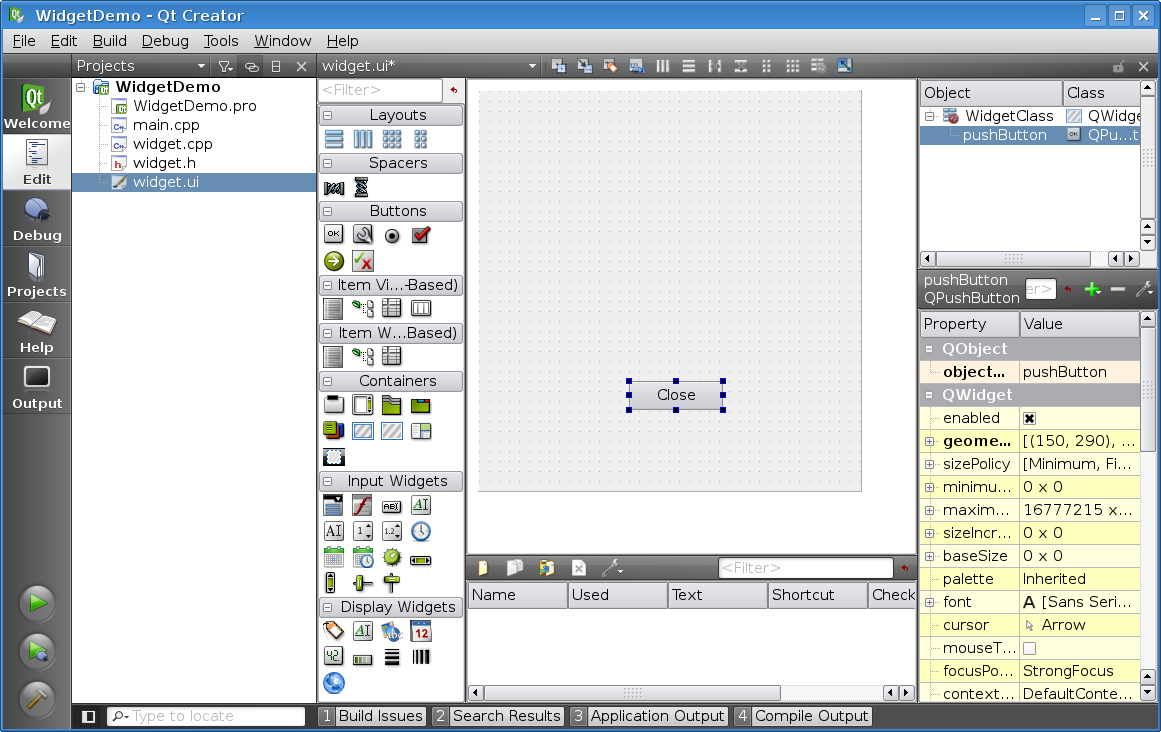

### Language bindings

To use these toolkits in you either use the language they are written in (Qt being written in C++), or you use a language binding to what you prefer/need to use. The language binding supplies the glue code to the toolkit.

There are primarily 2 options for Python and Qt, *PyQt* and *PySide*, which are very similar.

### Non widget based toolkits

If you need to make something graphical, but not with widgets (such as a game), then there are libraries like SDL (Simple Directmedia Layer) which enables convenient use of drawing areas (cross platform) where you are free to draw whatever you need yourself.

## Application = GUI + library

To keep development manageable, it is important to seperate the *engine* from the *graphics*. In most applications, this means to create a library that does the business logic, and a GUI-code that uses the library and simply presents the information to the user.

Many applications have multiple interfaces, supporting both a GTK and Qt GUI, and even command line and console interfaces, all using the same library. 

The next lecture will cover this in detail.

# Licenses

Here is a good idea to briefly discuss licensing.

Just like when you write a song or take a photo, you own the copyright on the code that you write.
You may grant others the right to use what you have created, and this is called as *licensing* your work. A license mean to give permission. A license can never retract legal rights, such as fair use.

Common licenses for open source codes are GPL, BSD-license, MIT-license. The main difference are the conditions set for use of this code when it comes to closed source software (i.e. you wish to sell your program, and not share the source code).

The GPL (and many GPL-like licenses) allows for selling the software, but under the condition that the *entire* source code of that software is also made available to whomever buys it (under the same conditions). PyQt is under the GPL license.

The BSD and MIT licenses are called *permissive* as they allow projects to use the source code but remain closed source themselves.

PySide and Qt are licensed under LGPL, which only requires you to share any modifications you have made to PySide itself (for example, fixing a bug in PySide for your application, then you are only required to share that bug fix). You can buy a commersial license for the software as well, where no sharing is required.

PyQt is licensed under GPL or alternatively an commercial license.

# Documentation

PySide and PyQt offers complete (?) access to all of Qt. For what we use in this course, it doesn't matter much what version of the documentation you find. Even Qt 4.8 documentation is probably fine.

PyQt documentation: https://www.riverbankcomputing.com/static/Docs/PyQt5/

# Qt - Hello world

The Qt library is divided into several modules. Here, all the components we might end up using are located in the `QtCore`, `QtGui`, `QtWidgets` modules.

In [1]:
from PyQt5.QtCore import *
from PyQt5.QtGui import *
from PyQt5.QtWidgets import *
import sys

*Since I will be using lots of widgets in examples we import everything (`*`) in these notebooks. The Qt library prefixes all it's classes with `Q` meaning it has very low chance of having any name collissions.*

Now, we can create the simplest of graphical interfaces

In [2]:
# Every Qt application must have one and only one QApplication object;
# it receives the command line arguments passed to the script, as they
# can be used to customize the application's appearance and behavior
qt_app = QApplication(sys.argv)

The `QApplication` is a bit special. It is the process that runs in the background and does all the graphics rendering and signals for our application, which is a core component of GUI applications.

For technical reasons, there can only be 1 QApplication per program. In order to run multiple examples repeatedly from 1 notebook session, we can spin off additional instances with `qt_app = QApplication.instance()`
For most normal, simple applications, you don't need to do this.

In [3]:
# Normally, one would just use the qt_app created above, but since I want to run applicaitons multiple times
# I have to create new instances of the app in this notebook document
qt_app = QApplication.instance() # Only necessary when you wish to start multiple separate applications!

# Create a label widget with our text
label = QLabel('Hello world!')
 
# Show it as a standalone widget (this makes the widget become a minimal window)
label.show()

# Run the application's event loop. The application can return error codes if it crashes, so lets print it:
print( qt_app.exec_() )

0


We see that the application returns an integer. This is often passed directly to the exit function:
```python
sys.exit( qt_app.exec_() )
```

I will not do this here, as it would mess up the active notebook!

There is also the `qt_app.quit` method that exists the application, closing any window that are still left over.

# Standard widgets

Extensive documentation on Qt can be found at
* https://doc.qt.io/qt-5.9/

Specifically the widget, layout, style examples found at
* https://doc.qt.io/qt-5.9/qtwidgets-index.html

There is also common dialog boxes, such as the `QMessageBox` to create popups that alerts the user or ask the user for various inputs.

# Examples

A wealth of examples is available at
https://wiki.python.org/moin/PyQt/Tutorials
https://github.com/PySide/Examples/tree/master/examples

Looking at example code is sometimes to fastest way to learn how to use a big library like Qt.

## Minimal example of interactivity

Lets have a look at a minimal example that actually does something interactive

In [4]:
def sayHello():
    print("Hello World!")

def sayHi():
    print("Hi")

# Create a button, connect it and show it
button = QPushButton("Click me")
button.pressed.connect(sayHi)
button.clicked.connect(sayHello)
button.show()
print( qt_app.exec_() )

0


This method can't actually pass anything to the function, but in Python we can store data inside objects and pass methods for that specific object. Lets have a look at another small example

In [5]:
class ButtonPainter:
    def __init__(self, button):
        self.button = button
        self.button.clicked.connect(self.choose_color)

    def choose_color(self):
        # Select color
        color = QColorDialog().getColor()
    
        if color.isValid():
            self.button.setStyleSheet('background-color:' + color.name())
        else:
            msgbox = QMessageBox()
            msgbox.setWindowTitle('Bad user!')
            msgbox.setText('No Color was Selected')
            msgbox.exec_()

# Create top level window/button
button = QPushButton('Choose Color')
# button.clicked.connect() doesn't support passing custom parameters to
# handler function (reference to the  button that we want to paint), so we
# create object that will hold this parameter
button_painter = ButtonPainter(button)
button.show()

qt_app.exec_()

0

# Building layouts

Rarely applications only have a single widget, and we can add widgets to other widgets:

In [6]:
window = QWidget() # Create the simplest widget, just an empty window.

lbl1 = QLabel('Hello', window) # The QLabel is owned by the window now
lbl1.move(15, 10)  # NOTE: this is a demonstration of what you SHOULD NOT DO

lbl2 = QLabel('world!', window)
lbl2.move(35, 40)

window.setGeometry(30, 30, 100, 70)
window.setWindowTitle('Hello world agian!')
window.show()

ret = qt_app.exec_()

But using fixed positions is pretty useless. We need to place widgets in a flexible manner. For this purpose, layouts exist

In [12]:
window = QWidget()

okButton = QPushButton("OK")
cancelButton = QPushButton("Cancel")

hbox = QHBoxLayout()
hbox.addStretch(1)
hbox.addWidget(okButton)
hbox.addWidget(cancelButton)


vbox = QVBoxLayout()
vbox.addLayout(hbox)
vbox.addStretch(1)
        
window.setLayout(vbox)    
        
window.setGeometry(300, 300, 300, 150)
window.setWindowTitle('Buttons')    
window.show()

ret = qt_app.exec_()

KeyboardInterrupt: 

There are many types of layout containers. Grid layouts and box layouts are very common.
They all inherit from QLayout, and for the built in layout types we have a listing https://doc.qt.io/qt-5/layout.html

The last assignment will require you to think over how you want to design your poker game. You can probably make do with the QHBoxLayout and QVBoxLayout, but other schemes might be suitable.

Layouts are **not** the only widgets that contain other widgets. For example, the `QGroupBox` draws a border around a region of widgets, and would be pointless if it could not contain anything. The base class of all widgets, `QWidget` has the core method `setLayout`, so for any widget you can add a layout, and the layout can in turn contain any number of widgets.

Applications are typically built up from heirarchies of layout containers.

In [8]:
# NOTE: You should customize a widget like in the next example rather than using global variables for layouts

window = QGroupBox("Box with layout inside!")

okButton = QPushButton("OK")
cancelButton = QPushButton("Cancel")

hbox = QHBoxLayout()
hbox.addStretch(1)
hbox.addWidget(okButton)
hbox.addWidget(cancelButton)

vbox = QVBoxLayout()
vbox.addStretch(1)
vbox.addLayout(hbox)
        
window.setLayout(vbox)
        
window.setGeometry(300, 300, 300, 150)
window.setWindowTitle('Buttons')    
window.show()

ret = qt_app.exec_()

# Customizing widgets

As seen in the simple example above, building up a complex GUI would become a **nightmare** of variables if they were all just listed in a global scope. To alleviate this, we can (and should) create custom, more complex widgets and build up our GUI **hierarchically**.
This way we can also have reusable GUI elements components (like the color picker dialog shown in the earlier example), and it also lets us develop the UI gradually.

*This is just like with functions; it would be awful to just write one huge function with hundreds of variables; instead we break down complex problems into a hierarchy of functions.*

We may inherit and extend the widgets available to us by creating new classes. This is done for *at least* the main window. You will want to define and finalize the layout structure in the initialization (`__init__`) of your custom widget:

In [9]:
class MyBox(QGroupBox):  # A group box might be nice here, lets of but a border and title around the widgets!
    def __init__(self):
        super().__init__("My box") # Call the QWidget initialization as well!

        okButton = QPushButton("OK")
        cancelButton = QPushButton("Cancel")

        hbox = QHBoxLayout()
        hbox.addStretch(1)
        hbox.addWidget(okButton)
        hbox.addWidget(cancelButton)

        vbox = QVBoxLayout()
        vbox.addStretch(1)
        vbox.addLayout(hbox)
        
        self.setLayout(vbox)

        self.setGeometry(300, 300, 300, 150)
        self.setWindowTitle('Buttons')    

win = MyBox()
win.show()
qt_app.exec_()

0

But we don't need to stop at one class. One should break down complex objects to the degree where they make sense so that they are easier to reason about.

The example above is already relatively simple, but if you find yourself with too many layouts and widgets that you no longer can immediately see the structure, you need to break them down further:

In [10]:
class HorizontalMenuBar(QWidget):
    def __init__(self, labels):
        super().__init__()  # don't forget super-init whenever you inherit. They are vitally important for Qt!

        self.labels = labels
        hbox = QHBoxLayout()
        hbox.addStretch(1)
        for label in labels:
            button = QPushButton(label)
            button.clicked.connect(lambda checked, label=label: print(label))
            hbox.addWidget(button)
        self.setLayout(hbox)

        
class MyBox(QGroupBox):
    def __init__(self):
        super().__init__("My awesome box") 
        
        vbox = QVBoxLayout()
        vbox.addStretch(1)
        vbox.addWidget(HorizontalMenuBar(['OK', 'Cancel']))
        # vbox.addWidget(MoreExcitingContent(...))
        self.setLayout(vbox)

        self.setGeometry(300, 300, 300, 150)

win = MyBox()
win.show()
qt_app.exec_()

0

While we can `.show()` any `QWidget` type (which is very convenient for developing a UI as you can test your components as you build them up), one should in most cases reserve the final top level window to the `QMainWindow` widget.
This widgets add comes with it's own layout scheme for menu, tool and status bars that you find in most classic desktop applications.
https://doc.qt.io/qt-5/qmainwindow.html

Apart from your layouts and widgets, you might want to occasionally use some of the premade windows. We looked at a QColorDialog earlier, lets try using some other pre-made windows

In [11]:
class MyWindow(QMainWindow):
    def __init__(self):
        super().__init__() 
        
        box = MyBox()
        self.setCentralWidget(box)
        
        self.menuBar().addAction("Undo")
        self.menuBar().addAction("Redo")
        self.menuBar().triggered.connect(self.menu_press)
        
        self.setGeometry(300, 300, 300, 150)
        self.setWindowTitle('Cool app')

    def menu_press(self, a):
        # Signals will be covered in details in lecture 12
        # The "self" parameter is passed to indicate the "parent" window.
        times, confirmed = QInputDialog.getInt(self, "You clicked!", f"How many times would you like to {a.text()}")

        if confirmed:
            msgbox = QMessageBox(self)
            msgbox.setWindowTitle('Confirmation')
            msgbox.setText(f'You requested to {a.text()} {times} times')
            msgbox.exec_()
        else:
            msgbox = QMessageBox(self)
            msgbox.setWindowTitle('Oh no')
            msgbox.setText(f'You aborted!')
            msgbox.exec_()


win = MyWindow()
win.show()
qt_app.exec_()

0

### Components you may find useful for CA3

* QApplication
* QMainWindow
* QInputDialog
* QMessageBox
* QErrorMessage


## Widgets

https://doc.qt.io/qt-5/examples-widgets.html

* QWidget
* QLabel
* QPushButton
* QSpinBox
* QLineEdit
* QSlider
* CardView widget (supplied on homepage)

## Layouts

https://doc.qt.io/qt-5/layout.html

* QHBoxLayout
* QVBoxLayout
* QGridLayout
* QStackedLayout
* QSpacerItem
* QSizePolicy

There are many many more components you can find useful!


# Assignment 3

The third assignment will have you implement a graphical Texas Hold'em poker game

Requirements:
1. Use of multiple **layouts** and widgets for creating a window
2. Use of MVC (Model View Controller) design; clearly separated *View* and *Controller* from the *Model* (covered in next 2 lectures). I will be strict on this! The *View* and *Controller* may not contain game logic, the *Model* may not contain any graphical elements.
3. Creating a game with at least 2 players (recommended to stick to just 2 players for simplified logic) which can play multiple rounds of betting.

The first step is for you to draw a design for the game and **show it to a teacher!** We will give feedback on what is reasonble to do, and we will guide you in the right direction early on! It should be "boxy", it must have a re-useable widget (thus a rectangular section) for each player.
You may use the custom widget for displaying a set of cards.

Second step is to cut this design (on paper) into sections which can be constructed using a hierarchy of the layouts  layout options. 
The QHBoxLayout and QVboxLayout will probably be your go-to options.
You can now start coding, using placeholder for all the actual player names/money/cards etc.

The hand in **must** be split into 3 python files
* `pokerview.py`
* `pokermodel.py`
* `pokergame.py`
* (and `cardlib.py` from CA2)

You introduce these files as should keep the model and view components separetely